### Assumptions of Linear Regression


Linear regression relies on several assumptions to ensure the validity and reliability 
of the estimates and inferences. The key assumptions of linear regression are:

1. Linearity
2. Normality of Residuals
3. Homoscedasticity
4. No Autocorrelation
5. No or little Multicollinearitaion

#### 1 Linearity
There is a linear relationship between the independent variables and the dependent variable. 
The model assumes that changes in the independent variables lead to proportional changes in 
the dependent variable.

##### What happens when this assumption is violated?

1. Bias in parameter estimates: When the true relationship is not linear, the estimated regression coefficients can be biased, leading to incorrect inferences about the relationship between the independent and dependent variables.

2. Reduced predictive accuracy: A mis specified linear model may not accurately capture the underlying relationship, which can result in poor predictive performance. The model might underfit the data, missing important patterns and trends.

3. Invalid hypothesis tests and confidence intervals: The violation of the linearity assumption can affect the validity of hypothesis tests and confidence intervals, leading to incorrect inferences about the significance of the independent variables and the effect sizes.

How to check this assumption


1. Scatter plots: Create scatter plots of the dependent variable against each independent variable. If the relationship appears to be linear, the linearity assumption is likely satisfied. Nonlinear patterns or other trends may indicate that the assumption is violated.

2. Residual plots: Plot the residuals (the differences between the observed and predicted values) against the predicted values or against each independent variable. If the linearity assumption holds, the residuals should be randomly scattered around zero, with no discernible pattern. Any trends, curvature, or heteroscedasticity in the residual plots suggest that the linearity assumption may be violated.

3. Polynomial terms: Add polynomial terms to your model and compare the model fit with the original linear model. If the new model with additional terms significantly improves the fit, it may suggest that the linearity assumption is violated.

###### What to do when the assumption fails?
1. Transformations: Apply transformations to the dependent and/or independent variables to make their relationship more linear. Common transformations include logarithmic, square root, and inverse transformations.

2. Polynomial regression: Add polynomial terms of the independent variables to the model to capture non-linear relationships.

3. Piecewise regression: Divide the range of the independent variable into segments and fit separate linear models to each segment.

4. Non-parametric or semi-parametric methods: Consider using non-parametric or semiparametric methods that do not rely on the linearity assumption, such as generalized additive models (GAMs), splines, or kernel regression.

### Assumption 1 - Individual Scatter Plots

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

df = pd.DataFrame()

df['x1'] = x.reshape(100)
df['x2'] = y.reshape(100)
df['y'] = z.reshape(100)

df

,x1,x2,y
0,-0.309157,0.280740,0.669418
1,-0.259573,0.714755,1.475381
2,-1.937850,-2.719501,11.603057
3,3.041856,2.697524,20.037404
4,3.644096,1.016868,17.812629
...,...,...,...
95,-0.910258,-1.988629,4.821526
96,2.898261,0.311491,11.385670
97,-1.019570,2.260694,7.881930
98,1.000553,-1.591344,7.320778


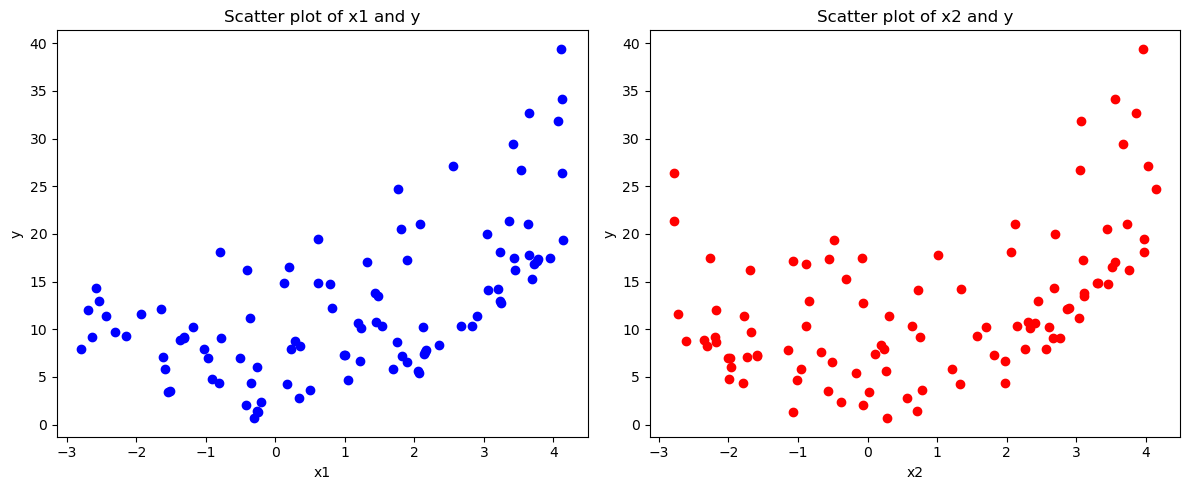

In [4]:
# Create a new figure and define subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot x1 and y
ax1.scatter(df['x1'], df['y'], color='blue')
ax1.set_title('Scatter plot of x1 and y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

# Plot x2 and y
ax2.scatter(df['x2'], df['y'], color='red')
ax2.set_title('Scatter plot of x2 and y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

### Assumption 1 - Residual Plot

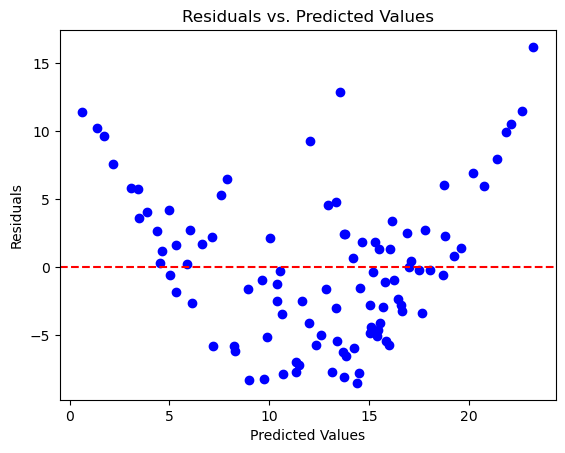

In [5]:
# Fit a linear regression model
X = df[['x1', 'x2']]
y = df['y']

model = LinearRegression()
model.fit(X, y)

# Calculate predicted values and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.show()

In [6]:
r2_score(y,y_pred)

0.4860709715563545

### Assumption 1 - Adding Polynomial Term

In [7]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

# Calculate metrics for linear model
linear_r2 = r2_score(y_test, linear_y_pred)
linear_mse = mean_squared_error(y_test, linear_y_pred)

# Fit a polynomial model
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)

# Calculate metrics for polynomial model
poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)

# Compare model performance
print("Linear model")
print(f"R-squared: {linear_r2:.4f}")
print(f"Mean Squared Error: {linear_mse:.4f}")

print("\nPolynomial model")
print(f"R-squared: {poly_r2:.4f}")
print(f"Mean Squared Error: {poly_mse:.4f}")


Linear model
R-squared: 0.4823
Mean Squared Error: 24.0478

Polynomial model
R-squared: 0.9869
Mean Squared Error: 0.6090


### Assumption 1 - Applying Transformation

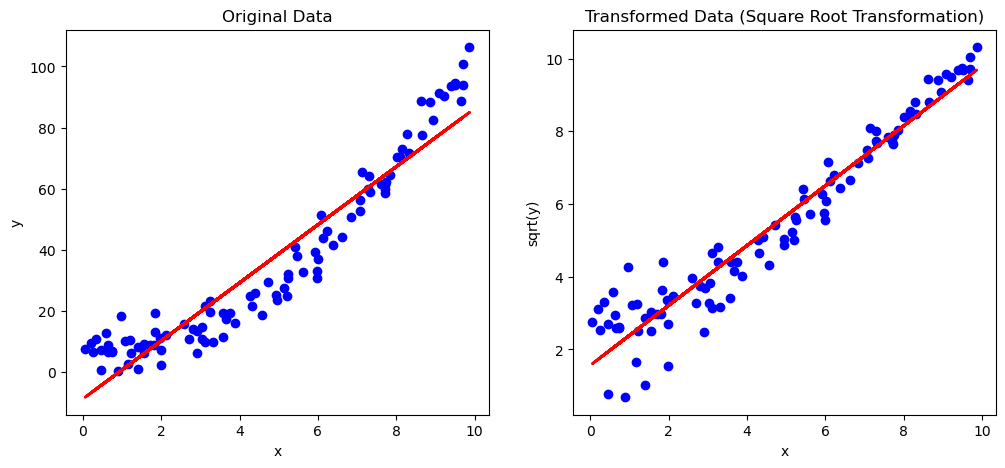

Original linear model
R-squared: 0.9008

Transformed linear model
R-squared: 0.9291


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative


# Apply square root transformation to y
y_sqrt = np.sqrt(y)

# Fit linear regression models for the original and transformed data
linear_model_original = LinearRegression()
linear_model_original.fit(x, y)
linear_model_transformed = LinearRegression()
linear_model_transformed.fit(x, y_sqrt)

# Predictions
y_pred_original = linear_model_original.predict(x)
y_pred_transformed = linear_model_transformed.predict(x)

# Visualize the relationship between x and y before and after transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before transformation
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_original, color='red', linewidth=2)
ax1.set_title('Original Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# After transformation
ax2.scatter(x, y_sqrt, color='blue')
ax2.plot(x, y_pred_transformed, color='red', linewidth=2)
ax2.set_title('Transformed Data (Square Root Transformation)')
ax2.set_xlabel('x')
ax2.set_ylabel('sqrt(y)')

plt.show()

# Calculate R-squared and Mean Squared Error
r2_original = r2_score(y, y_pred_original)
r2_transformed = r2_score(y_sqrt, y_pred_transformed)

# Compare the performance of the original and transformed models
print("Original linear model")
print(f"R-squared: {r2_original:.4f}")

print("\nTransformed linear model")
print(f"R-squared: {r2_transformed:.4f}")


### Assumption 1 - Applying Polynomial Regression

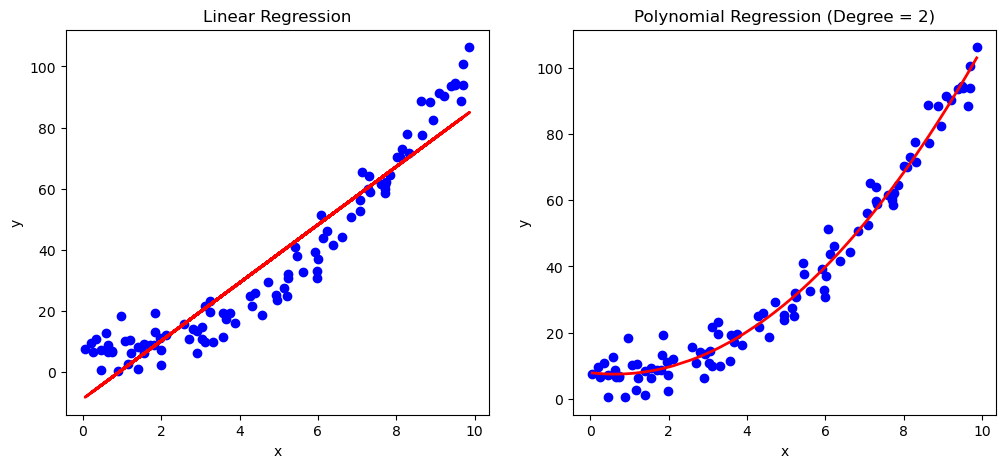

Linear regression
R-squared: 0.9008

Polynomial regression (degree = 2)
R-squared: 0.9782


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

# Fit polynomial regression model (degree = 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

# Visualize the fitted lines for linear and polynomial regression
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear regression
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_linear, color='red', linewidth=2)
ax1.set_title('Linear Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Polynomial regression
ax2.scatter(x, y, color='blue')
ax2.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color='red', linewidth=2)
ax2.set_title('Polynomial Regression (Degree = 2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

# Calculate R-squared for both models
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

# Compare the performance of the linear and polynomial regression models
print("Linear regression")
print(f"R-squared: {r2_linear:.4f}")

print("\nPolynomial regression (degree = 2)")
print(f"R-squared: {r2_poly:.4f}")


### 2. Normality of Residual

The error terms (residuals) are assumed to follow a normal distribution with a mean of zero 
and a constant variance.

#### What happens when this assumption is violated?


1. Inaccurate hypothesis tests: The t-tests and F-tests used to assess the significance of the regression coefficients and the overall model rely on the normality assumption. If the residuals are not normally distributed, these tests may produce inaccurate results, leading to incorrect inferences about the significance of the independent variables.

2. Invalid confidence intervals: The confidence intervals for the regression coefficients are based on the assumption of normally distributed residuals. If the normality assumption is violated, the confidence intervals may not be accurate, affecting the interpretation of the effect sizes and the precision of the estimates.

3. Model performance: The violation of the normality assumption may indicate that the chosen model is not the best fit for the data, potentially leading to reduced predictive accuracy.

##### How to check this assumption

1. Histogram of residuals: Plot a histogram of the residuals to visually assess their distribution. If the histogram resembles a bell-shaped curve, it suggests that the residuals are normally distributed.

2. Q-Q plot: A Q-Q (quantile-quantile) plot compares the quantiles of the residuals to the quantiles of a standard normal distribution. If the points in the Q-Q plot fall approximately along a straight line, it indicates that the residuals are normally distributed. Deviations from the straight line suggest deviations from normality.

3. Statistical tests: Statistical tests like Omnibus test, Jarque-Bera test or even Shapiro wilk test can test this assumption

#### What to do when the assumption fails?

1. Model selection techniques: Employ model selection techniques like cross-validation, AIC, or BIC to choose the best model among different candidate models that can handle nonnormal residuals.

2. Robust regression: Use robust regression techniques that are less sensitive to the distribution of the residuals, such as M-estimation, Least Median of Squares (LMS), or Least Trimmed Squares (LTS).(Transformation may also help)

3. Non-parametric or semi-parametric methods: Consider using non-parametric or semiparametric methods that do not rely on the normality assumption, such as generalized additive models (GAMs), splines, or kernel regression.

4. Use bootstrapping: Bootstrap-based inference methods do not rely on the normality of residuals and can provide more accurate confidence intervals and hypothesis tests.

Remember that the normality of residuals assumption is not always critical for linear 
regression, especially when the sample size is large, due to the Central Limit Theorem.


### Omnibus Test

The Omnibus test is a statistical test used to check if the residuals from a 
linear regression model follow a normal distribution. The test is based on 
the skewness and kurtosis of the residuals. Here's a step-by-step guide on 
how to conduct the Omnibus test:

1. Decide the Null and Alternate Hypothesis: The Null hypothesis states that the residuals are normally distributed and the Alternate Hypothesis says that the residuals are not normally distributed.

2. Fit the linear regression model: Fit the linear regression model to your data to obtain the predicted values.

3. Calculate the residuals: Compute the residuals  (error terms) by subtracting the predicted values from the observed values of the dependent variable.

4. Calculate the skewness: Calculate the skewness of the residuals. Skewness measures the asymmetry of the distribution. For a normal distribution, skewness is expected to be close to zero.

5. Calculate the kurtosis: Calculate the kurtosis of the residuals. Kurtosis measures the "tailedness" of the distribution. For a normal distribution, kurtosis is expected to be close to zero (in excess kurtosis terms).

6. Calculate the Omnibus test statistic: Compute the Omnibus test statistic (K^2) using the skewness and kurtosis values. The formula for the Omnibus test statistic is:

K^2 = n * [(skew)^2/6 + (kurtosis)^2/24]

6. Determine the p-value: The Omnibus test statistic follows a chisquare distribution with 2 degrees of freedom. Use this distribution to calculate the p-value corresponding to the test statistic.

7. Compare the p-value to the significance level: Compare the p-value obtained in step 6 to your chosen significance level (e.g., 0.05). If the p-value is greater than the significance level, you can accept the null hypothesis that the residuals are normally distributed. If the p-value is smaller than the significance level, you reject the null hypothesis, suggesting that the residuals may not follow a normal distribution.




### Assumption 2 - Histogram & QQ Plot

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset
np.random.seed(42)
x = np.random.rand(100, 1)
y = 3 * x + np.random.normal(0, 0.3, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred


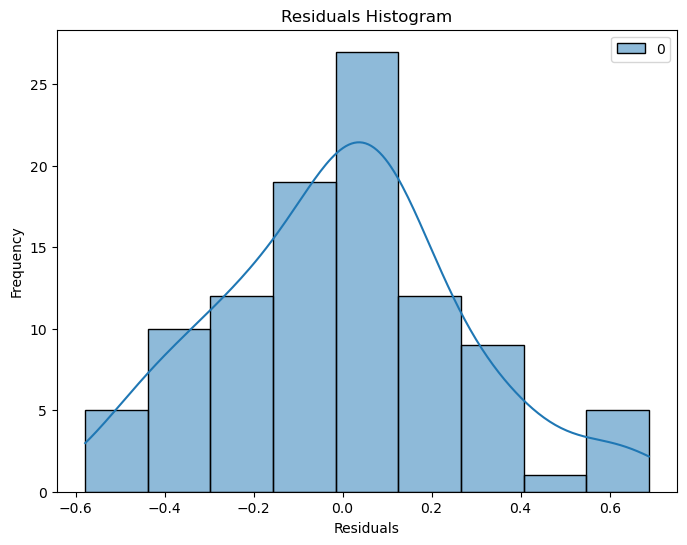

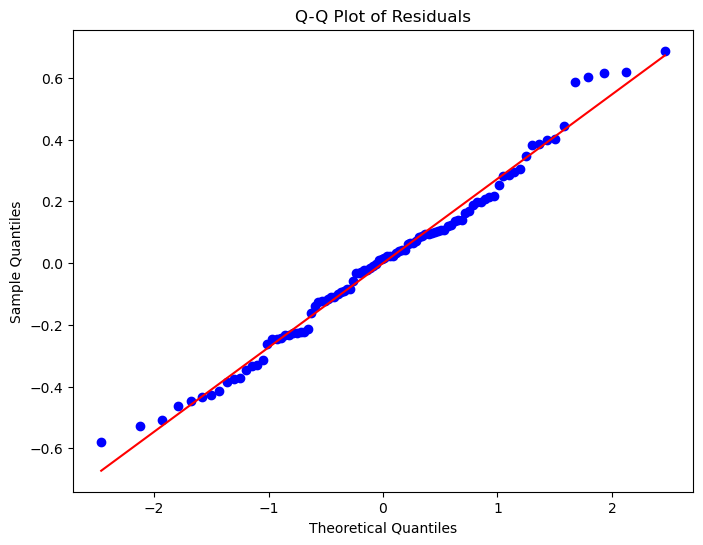

In [11]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [12]:
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")

Mean of residuals: 0.0000


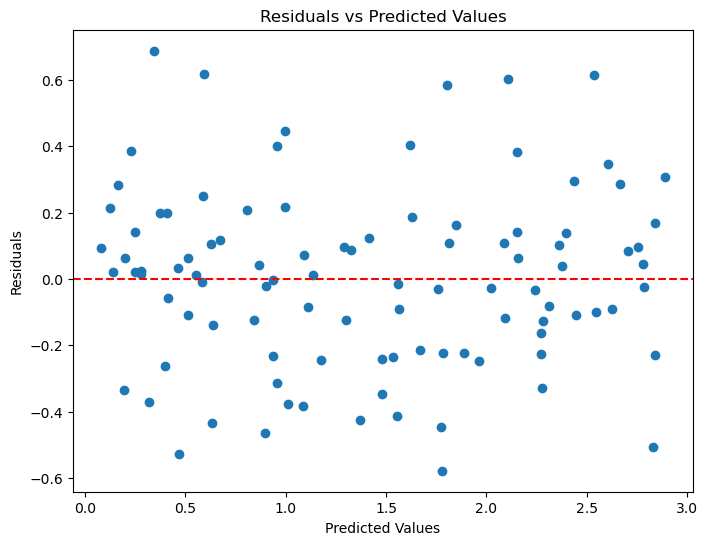

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


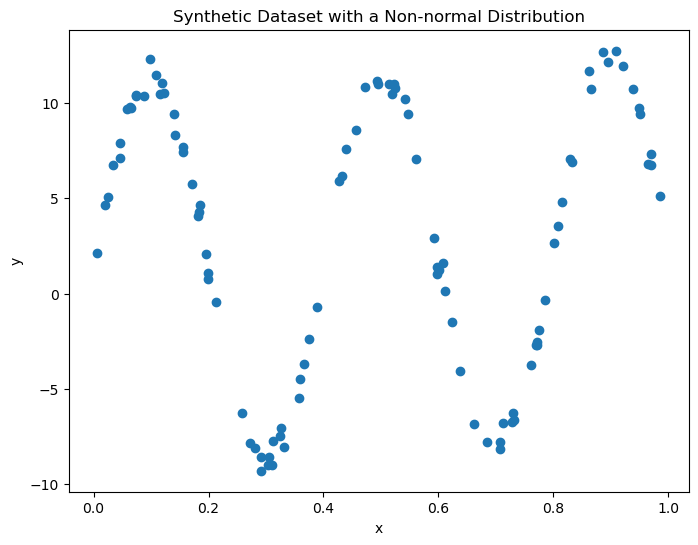

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Dataset with a Non-normal Distribution')
plt.show()


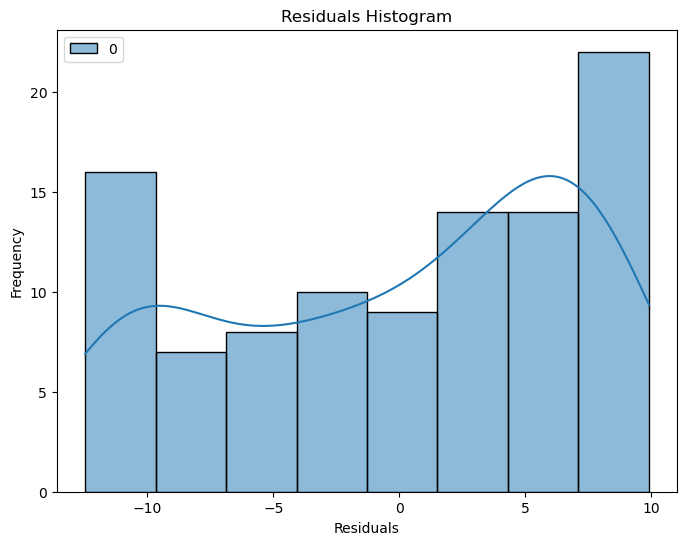

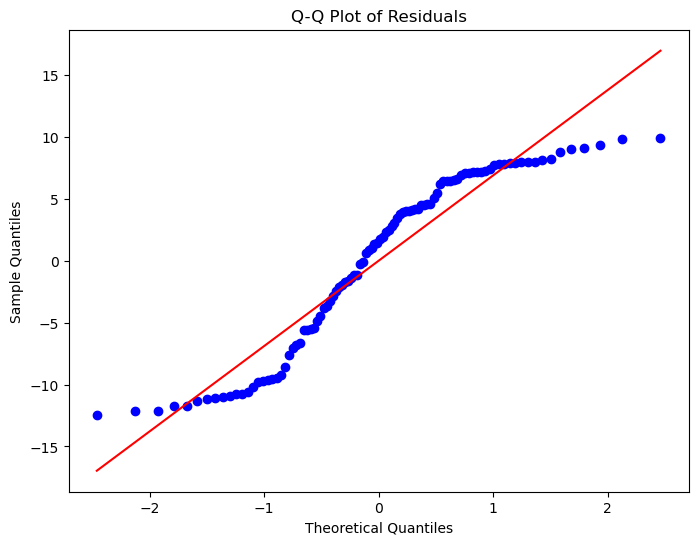

In [16]:
# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [17]:
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")


Mean of residuals: -0.0000


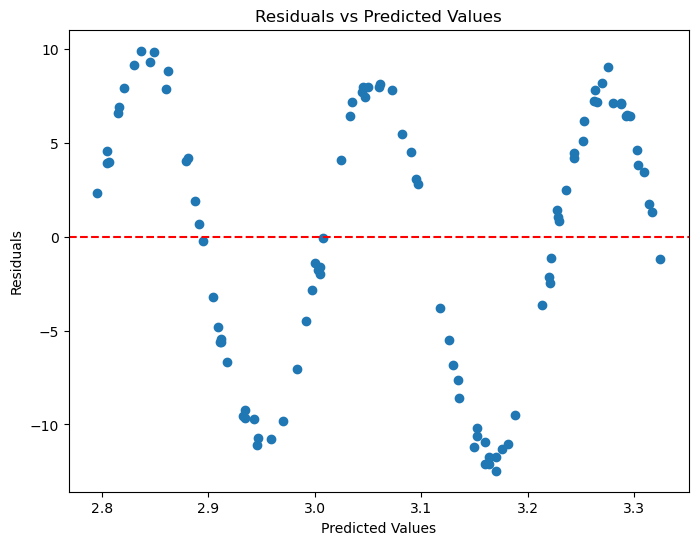

In [16]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


### Assumption 2 - Omnibus Test

In [18]:
# Generate a synthetic dataset
np.random.seed(42)
x = np.random.rand(100, 1)
y = 3 * x + np.random.normal(0, 0.3, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Calculate skewness, kurtosis, Omnibus test statistic, and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")

Skewness: 0.2173
Kurtosis: -0.0712
Omnibus test statistic: 0.9002
Omnibus test p-value: 0.6376


In [19]:
np.random.seed(42)

# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Calculate skewness, kurtosis, Omnibus test statistic, and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")

Skewness: -0.3717
Kurtosis: -1.2746
Omnibus test statistic: 50.6234
Omnibus test p-value: 0.0000


## 3. Homoscedasticity


The spread of the error terms (residuals) should be constant across all levels of the 
independent variables. If the spread of the residuals changes systematically, it leads to 
heteroscedasticity, which can affect the efficiency of the estimates

#### What happens when this assumption is violated?

1. Inefficient estimates: While the parameter estimates (coefficients) are still unbiased, they 
are no longer the best linear unbiased estimators (BLUE) under heteroscedasticity. The 
inefficiency of the estimates implies that the standard errors are larger than they should 
be, which may reduce the statistical power of hypothesis tests.
1.
Inaccurate hypothesis tests: The t-tests and F-tests used to assess the significance of the 
regression coefficients and the overall model rely on the assumption of homoscedasticity. 
If the residuals exhibit heteroscedasticity, these tests may produce misleading results, 
leading to incorrect inferences about the significance of the independent variables.
2.
Invalid confidence intervals: The confidence intervals for the regression coefficients are 
based on the assumption of homoscedastic residuals. If the homoscedasticity assumption 
is violated, the confidence intervals may not be accurate, affecting the interpretation of 
the effect sizes and the precision of the estimates.

### How to check this assumption

2. Residual plot: Create a scatter plot of the residuals (the differences between the observed 
and predicted values) against the predicted values or against each independent variable. 
If the plot shows a random scattering of points around zero with no discernible pattern, it 
suggests homoscedasticity. If there is a systematic pattern, such as a funnel shape or a 
curve, it indicates heteroscedasticity.
1.
Breusch-Pagan test: This is a formal statistical test for heteroscedasticity. The null 
hypothesis is that the error variances are constant (homoscedastic). If the resulting pvalue is less than a chosen significance level (e.g., 0.05), the null hypothesis is rejected, 
indicating heteroscedasticity

### What to do when the assumption fails?

1. Transformations: Apply transformations to the dependent and/or independent variables 
to stabilize the variance of the residuals. Common transformations include logarithmic, 
square root, and inverse transformations.
1.
Weighted Least Squares (WLS): Use a weighted least squares approach, which assigns 
different weights to the observations based on the magnitude of their residuals. This 
method can help account for heteroscedasticity by giving more importance to 
observations with smaller residuals and less importance to those with larger residuals.
2.
Robust standard errors: Calculate robust (or heteroscedasticity-consistent) standard 
errors for the regression coefficients. These standard errors are more reliable under 
heteroscedasticity and can be used to perform more accurate hypothesis tests and 
construct valid confidence intervals.

#### Breusch-Pagan Test

The Breusch-Pagan test, also known as the Cook-Weisberg test, is a statistical 
test used to detect heteroscedasticity in a linear regression model. The test is 
based on the assumption that the variance of the errors is a function of one or 
more independent variables. Here are the steps to perform the Breusch-Pagan 
test:

1. Estimate the linear regression model: Fit a linear regression model to the 
data using the ordinary least squares (OLS) method. Obtain the residuals 
(errors) from this model.

2. Calculate the squared residuals: Square each residual obtained in step 
1.
Regress squared residuals on the independent variables: Perform another 
linear regression, this time with the squared residuals as the dependent 
variable and the same set of independent variables used in the original 
model. Obtain the R-squared value from this regression.
3.
Calculate the test statistic: The Breusch-Pagan test statistic, known as the 
Lagrange Multiplier (LM) statistic, is calculated as follows:
LM = n * R²
where n is the number of observations and R² is the R-squared value 
obtained in step 3.
4.
Determine the p-value: The LM statistic follows a chi-squared distribution 
with k degrees of freedom, where k is the number of independent 
variables (excluding the constant term). Calculate the p-value for the LM 
statistic using the chi-squared distribution.
5.
Make a decision based on the p-value: Compare the calculated p-value to 
a chosen significance level (usually α = 0.05). If the p-value is less than or 
equal to α, reject the null hypothesis and conclude that there is evidence 
of heteroscedasticity in the data. If the p-value is greater than α, do not 
reject the null hypothesis and assume that the data exhibits 
homoscedasticity (constant variance of the residuals).


Note that the Breusch-Pagan test assumes a linear relationship between the 
independent variables and the variance of the errors. If the relationship is not 
linear, the test may not be appropriate, and other tests for heteroscedasticity 
should be considered.

### Assumption 3 - Residual Plot

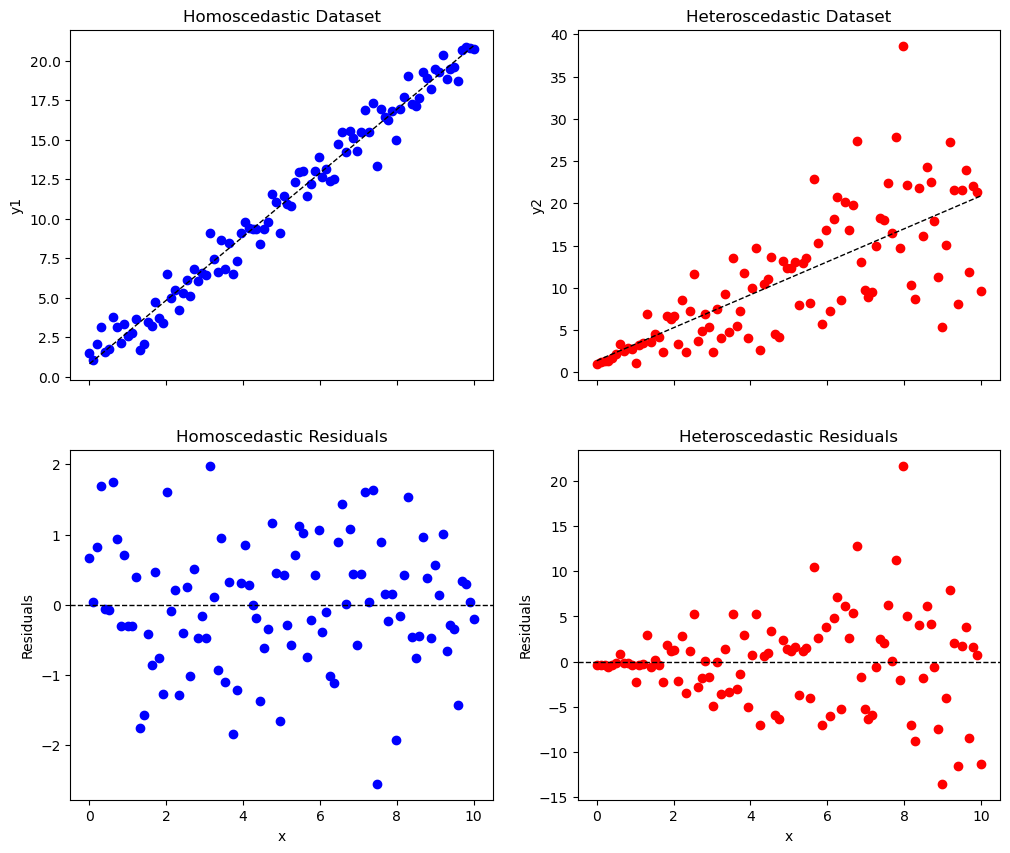

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(0, 10, 100)

# Homoscedastic dataset
y1 = 2 * x + 1 + np.random.normal(0, 1, len(x))

# Heteroscedastic dataset
y2 = 2 * x + 1 + np.random.normal(0, x, len(x))

# Fit linear models
coeffs1 = np.polyfit(x, y1, 1)
y1_pred = np.polyval(coeffs1, x)
residuals1 = y1 - y1_pred

coeffs2 = np.polyfit(x, y2, 1)
y2_pred = np.polyval(coeffs2, x)
residuals2 = y2 - y2_pred

# Plot datasets and residuals
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Plot dataset 1
axes[0, 0].scatter(x, y1, color='blue')
axes[0, 0].plot(x, y1_pred, color='black', linestyle='--', lw=1)
axes[0, 0].set_title('Homoscedastic Dataset')
axes[0, 0].set_ylabel('y1')

# Plot dataset 2
axes[0, 1].scatter(x, y2, color='red')
axes[0, 1].plot(x, y2_pred, color='black', linestyle='--', lw=1)
axes[0, 1].set_title('Heteroscedastic Dataset')
axes[0, 1].set_ylabel('y2')

# Plot residuals for dataset 1
axes[1, 0].scatter(x, residuals1, color='blue')
axes[1, 0].axhline(0, color='black', linestyle='--', lw=1)
axes[1, 0].set_title('Homoscedastic Residuals')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Residuals')

# Plot residuals for dataset 2
axes[1, 1].scatter(x, residuals2, color='red')
axes[1, 1].axhline(0, color='black', linestyle='--', lw=1)
axes[1, 1].set_title('Heteroscedastic Residuals')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Residuals')

plt.show()


### Assumption 3 - Breusch-Pagan Test

In [24]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


# Fit linear models
x_with_constant1 = sm.add_constant(x)
model1 = sm.OLS(y1, x_with_constant1).fit()

x_with_constant2 = sm.add_constant(x)
model2 = sm.OLS(y2, x_with_constant2).fit()

# Perform Breusch-Pagan test
bp_test1 = het_breuschpagan(model1.resid, x_with_constant1)
bp_test2 = het_breuschpagan(model2.resid, x_with_constant2)

print("Homoscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test1[0]}\nLM-Test p-value: {bp_test1[1]}\nF-Statistic: {bp_test1[2]}\nF-Test p-value: {bp_test1[3]}\n")

print("Heteroscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test2[0]}\nLM-Test p-value: {bp_test2[1]}\nF-Statistic: {bp_test2[2]}\nF-Test p-value: {bp_test2[3]}")


Homoscedastic dataset - Breusch-Pagan test results:
LM Statistic: 0.2728976751265044
LM-Test p-value: 0.6013945776291403
F-Statistic: 0.2681715555644599
F-Test p-value: 0.6057280388642077

Heteroscedastic dataset - Breusch-Pagan test results:
LM Statistic: 13.074070036062713
LM-Test p-value: 0.00029941183477116693
F-Statistic: 14.739662423694503
F-Test p-value: 0.0002188273543354323


In [23]:
model1.resid

array([ 6.69527007e-01,  3.31552936e-02,  8.17714874e-01,  1.69166293e+00,
       -6.69135580e-02, -6.82903995e-02,  1.74366611e+00,  9.30494768e-01,
       -3.07807606e-01,  7.02833564e-01, -3.04537432e-01, -3.08242752e-01,
        3.98056014e-01, -1.75857976e+00, -1.57161061e+00, -4.10373565e-01,
       -8.62310415e-01,  4.63374778e-01, -7.60289889e-01, -1.26596277e+00,
        1.61059644e+00, -8.22218923e-02,  2.09689354e-01, -1.28398030e+00,
       -4.05008094e-01,  2.48903961e-01, -1.01440547e+00,  5.10892871e-01,
       -4.66837097e-01, -1.59285416e-01, -4.70691538e-01,  1.98190000e+00,
        1.14731331e-01, -9.30875633e-01,  9.47986949e-01, -1.09679487e+00,
        3.31519113e-01, -1.83840786e+00, -1.20831705e+00,  3.15336976e-01,
        8.55549061e-01,  2.87057503e-01, -1.35232004e-03, -1.88200993e-01,
       -1.36701255e+00, -6.09728024e-01, -3.51915846e-01,  1.16445189e+00,
        4.49554696e-01, -1.65849701e+00,  4.27233857e-01, -2.83325652e-01,
       -5.76558631e-01,  

### Assumption 3 - WLS


The **Weighted Least Squares (WLS)** method is an extension of the ordinary least squares (OLS) method used in linear regression. It addresses situations where the assumption of constant variance (homoscedasticity) of the error terms is violated, i.e., when there is **heteroscedasticity**, meaning the error variances are not constant across observations. WLS assigns different weights to different observations to account for this variability.

### Key Concepts of WLS:
1. **Basic Idea**: In WLS, observations with smaller error variances (higher precision) are given more weight, while those with larger error variances (lower precision) are given less weight. This minimizes the impact of observations with high variance and ensures a better fit of the regression model.

2. **Regression Equation**:
   - The model in OLS is typically expressed as:
     
     Y = X*beta + e
    
     where Y is the vector of dependent variable values, X is the matrix of independent variables, beta is the vector of coefficients, and e is the vector of error terms.
   - In WLS, the weighted version becomes:
     
     Y = X*beta + E {with weighted residuals}.
     
   
3. **Weighting**:
   - The weights, w_i, are usually the inverse of the variance of the errors for each observation. Observations with higher variance are down-weighted, and those with lower variance are up-weighted.
   - The weighted least squares estimator for beta is:
    
     Y_hat{beta}_{WLS} = (X^T W X)^{-1} X^T W Y
     
     where (W) is a diagonal matrix of weights.

4. **Error Variance**:
   - In OLS, we assume:
     
     {Var}(epsilon_i) = sigma^2
    
    
   - In WLS, we assume:
   
     {Var}(epsilon_i) = {sigma^2}/{w_i}
     
     so each observation (i) has its own variance, and the model accounts for heteroscedasticity.

5. **Advantages**:
   - WLS provides more efficient and unbiased estimators when heteroscedasticity is present.
   - It improves model fit and inference accuracy, compared to OLS in cases where error variances are unequal.

6. **Example**: 
   - Suppose you are modeling the relationship between income and expenditure, but for high-income individuals, the expenditure data has more variability. In WLS, you'd assign smaller weights to these high-variance observations and larger weights to more consistent (low-variance) observations, leading to more reliable coefficient estimates.

### When to Use WLS:
- When heteroscedasticity is detected in your data.
- When certain observations are inherently more reliable or important than others.



In [55]:
wd=np.diag(weights)
xt=np.dot(x_scaled_with_constant.T,wd).T
xt

array([[ 1.75972768e+01, -3.01760926e+01],
       [ 1.87979344e+01, -3.15837874e+01],
       [ 1.09429675e+01, -1.80069872e+01],
       [ 4.58765168e+00, -7.39019211e+00],
       [ 2.82758683e+01, -4.45696973e+01],
       [ 3.24743969e+01, -5.00626050e+01],
       [ 1.97038993e+00, -2.96929793e+00],
       [ 3.93035646e+00, -5.78672986e+00],
       [ 5.49671111e+02, -7.90247896e+02],
       [ 4.37297461e+00, -6.13542028e+00],
       [ 9.63881495e+04, -1.31896441e+05],
       [ 1.21693474e+03, -1.62308161e+03],
       [ 7.07480271e+00, -9.19089787e+00],
       [ 9.46944200e-01, -1.19737336e+00],
       [ 1.01653674e+00, -1.25015474e+00],
       [ 2.52709617e+01, -3.02032170e+01],
       [ 2.85187189e+00, -3.30968878e+00],
       [ 4.07548893e+00, -4.58854946e+00],
       [ 2.77137562e+00, -3.02425414e+00],
       [ 7.81468468e-01, -8.25702571e-01],
       [ 3.44508957e-01, -3.52074745e-01],
       [ 3.48368125e+03, -3.43950234e+03],
       [ 1.13525421e+01, -1.08152896e+01],
       [ 4.

OLS Model Summary
------------------
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     539.1
Date:                Fri, 25 Oct 2024   Prob (F-statistic):           1.28e-41
Time:                        19:33:09   Log-Likelihood:                -233.35
No. Observations:                 100   AIC:                             470.7
Df Residuals:                      98   BIC:                             475.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1

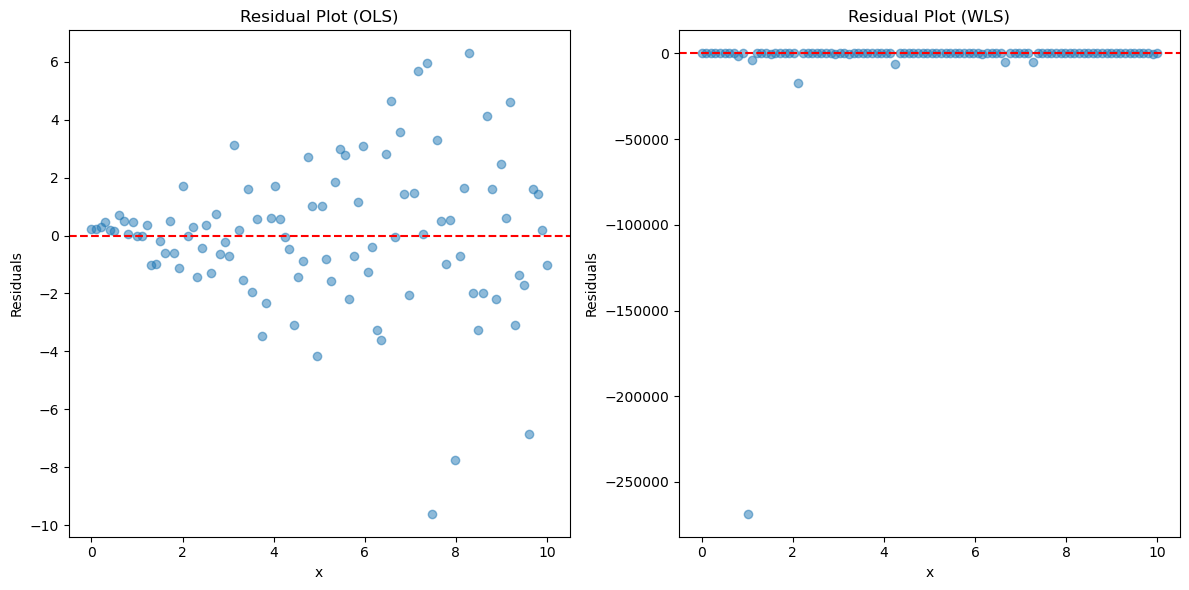

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with more pronounced heteroscedasticity
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, (0.5 * x), len(x))

# Scale the independent variables
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x.reshape(-1, 1))

# Add a constant term to the scaled independent variable
x_scaled_with_constant = sm.add_constant(x_scaled)

# Fit an OLS model
model_ols = sm.OLS(y, x_scaled_with_constant).fit()

# Calculate the squared residuals
squared_residuals = model_ols.resid**2

# Use the squared residuals with a small constant added as the weights for WLS
weights = 1 / (squared_residuals + 1e-10)

# Fit a WLS model using the estimated weights
model_wls = sm.WLS(y, x_scaled_with_constant, weights=weights).fit()

# Print the model summaries
print("OLS Model Summary")
print("------------------")
print(model_ols.summary())
print("\nWLS Model Summary")
print("------------------")
print(model_wls.summary())

wd=np.diag(weights)
xt=np.dot(x_scaled_with_constant.T,wd).T

res_wls=y-model_wls.predict(xt)

bp_test1 = het_breuschpagan(model_ols.resid, x_scaled_with_constant)
bp_test2 = het_breuschpagan(res_wls, x_scaled_with_constant)

print("Homoscedastic dataset - Breusch-Pagan test results for OLS Method:")
print(f"LM Statistic: {bp_test1[0]}\nLM-Test p-value: {bp_test1[1]}\nF-Statistic: {bp_test1[2]}\nF-Test p-value: {bp_test1[3]}\n")

print("Heteroscedastic dataset - Breusch-Pagan test results: for WLS Method")
print(f"LM Statistic: {bp_test2[0]}\nLM-Test p-value: {bp_test2[1]}\nF-Statistic: {bp_test2[2]}\nF-Test p-value: {bp_test2[3]}")

# Plot the residual plots for OLS and WLS
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(x, model_ols.resid, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot (OLS)')

plt.subplot(1, 2, 2)
plt.scatter(x, res_wls, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Residual Plot (WLS)')
plt.tight_layout()
plt.show()


<Axes: ylabel='Density'>

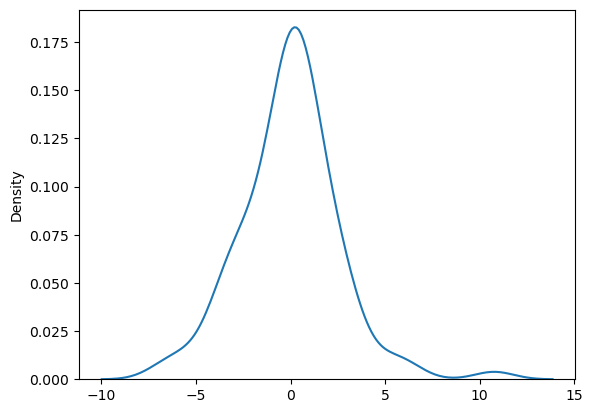

In [61]:
import seaborn as sns

sns.kdeplot(model_wls.resid)

<Axes: ylabel='Density'>

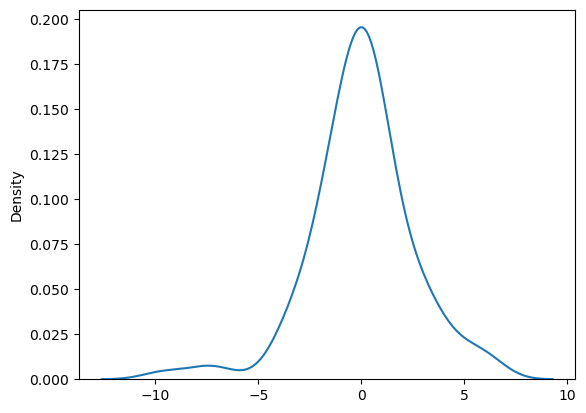

In [43]:
sns.kdeplot(model_ols.resid)

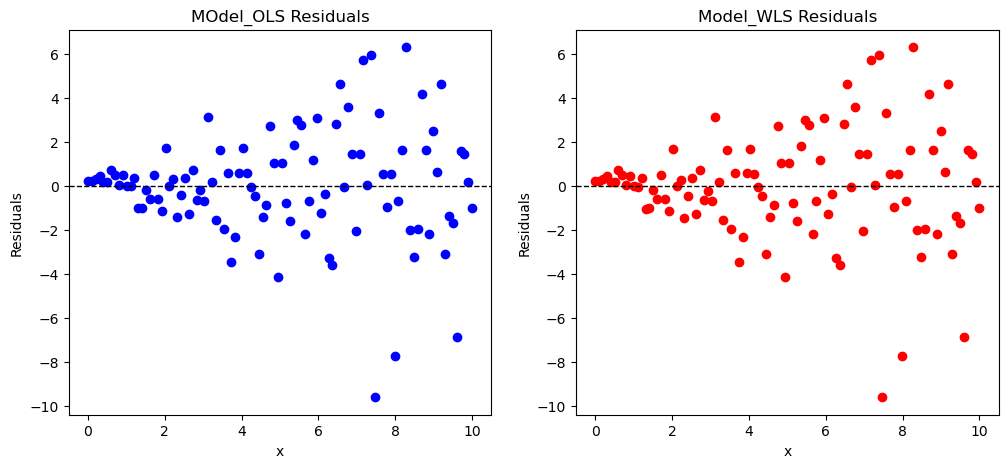

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Plot residuals for dataset 1
axes[0].scatter(x, model_ols.resid, color='blue')
axes[0].axhline(0, color='black', linestyle='--', lw=1)
axes[0].set_title('MOdel_OLS Residuals')
axes[0].set_xlabel('x')
axes[0].set_ylabel('Residuals')

# Plot residuals for dataset 2
axes[1].scatter(x, model_wls.resid, color='red')
axes[1].axhline(0, color='black', linestyle='--', lw=1)
axes[1].set_title('Model_WLS Residuals')
axes[1].set_xlabel('x')
axes[1].set_ylabel('Residuals')

plt.show()

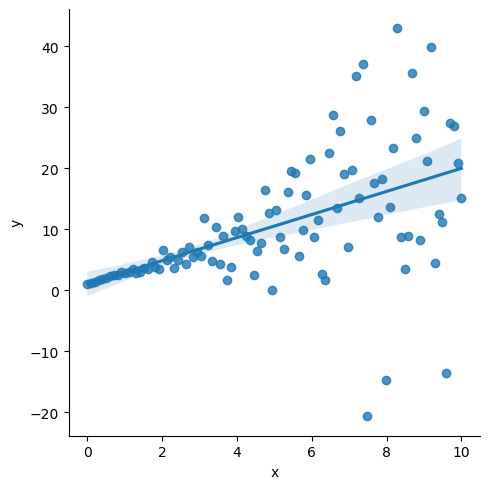

In [67]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data with more pronounced heteroscedasticity
x = np.linspace(0, 10, 100)
y = 2 * x + 1 + np.random.normal(0, (0.5 * x) ** 2, len(x))

# Create a DataFrame with the generated data
data = {'x': x, 'y': y}
df = pd.DataFrame(data)

# Plot the lmplot with confidence intervals
sns.lmplot(x='x', y='y', data=df, ci=95)
plt.show()
